## Chapter 5

40. リッジ回帰をscikit-learn準拠でコーディングし, 実験せよ.
	- 実験データは[Boston house prices dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)を用いよ.
	- ハイパーパラメータの最適化も行うこと.

In [1]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

boston = load_boston()
X = boston.data
T = boston.target
print(X.shape)
print(T.shape)

(506, 13)
(506,)


In [2]:
X = X - np.mean(X, axis=0)
T = T - np.mean(T, axis=0)
np.random.seed(0)
p = np.random.permutation(len(X)) # random　な　index のリスト
X = X[p]
T = T[p]
X_train = X[:round(len(X)/2), :]
T_train = T[:round(len(T)/2)]
X_test = X[round(len(X)/2):, :]
T_test = T[round(len(T)/2):]

(253, 2)
(253, 2)


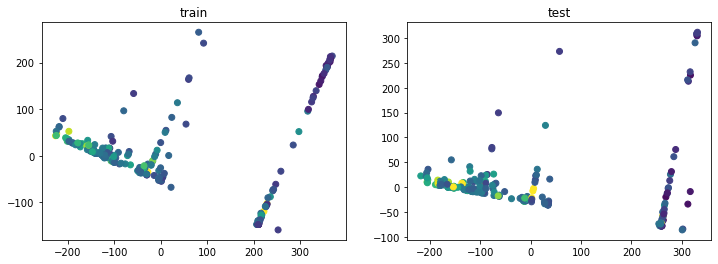

In [3]:
from sklearn.decomposition import PCA

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train) # 次元圧縮
print(X_train_pca.shape)
X_test_pca = pca.fit_transform(X_test) # 次元圧縮
print(X_test_pca.shape)

axes[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=T_train)
axes[0].set_title("train")
axes[1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=T_test)
axes[1].set_title("test")

fig.show()

In [8]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_is_fitted, check_array

class MyLinearRegression(BaseEstimator, RegressorMixin):
    def __init__(self, lam = 0, a = None, b = None):
        """
        Initialize a coefficient and an intercept.
        """
        self.lam = lam
        self.a = a
        self.b = b
        
    def fit(self, X, y):
        """
        X: array-like, shape (n_samples, n_features)
        y: array, shape (n_samples,)
        Estimate a coefficient and an intercept　from data.
        """
        X, y = check_X_y(X, y, y_numeric=True)
        
        #すべてのxに対してベクトルx_0=1を組み込む
        phi_0 = np.ones((len(X), 1))
        Phi = np.hstack([phi_0, X])
        
        #lamda * I の正則化行列の作成
        Lam = self.lam * np.eye(len(Phi[0]))
        
        if len(X) < len(X[0]):
            """
            特徴数がサンプル数より多い場合は警告       
            また通常の処理が行えないので特別に処理
            すべてのサンプルデータに一致するように適当に数字を割り当てる
            """
            print("data < feature")
            w_ML = np.zeros(len(X[0]))
            s = np.linalg.solve(X[:,:len(X)], y)
            for i in range(len(X)):
                w_ML[i] = s[i]
            
        else:
            
            """
            通常の処理
            正規化項の要素を含んだムーアペンローズの擬似逆行列　（Phi_dagger) を求める
            Phiは　x_０を含んだデータを　（サンプル数）行　　（特徴数）列　で並べた計画行列
            最後に最尤推定解 w_ML を　Phi_daggerと目標値tから求める
            """
            PhiT_Phi = Lam + np.dot(Phi.transpose(), Phi)
            Phi_dagger = np.dot(np.linalg.inv(PhiT_Phi), Phi.transpose())
            w_ML = np.dot(Phi_dagger, y)
            
        #　w_0にb　が　w_1~w_(M-1)にaが格納されているので代入
        self.a_ = w_ML[1:]
        self.b_ = w_ML[0]
        return self
    
    def predict(self, X):
        """
        Calc y from X
        """
        try:
            check_is_fitted(self, "a_", "b_") # 学習済みかチェックする(推奨)
        except:
            print("use predict after fit")
            return np.zeros(len(X))
        #print(type(X))
        y = np.dot(X, self.a_)
        y += self.b_
        X = check_array(X)
        return y

In [7]:
from sklearn.utils.estimator_checks import check_estimator
check_estimator(MyLinearRegression)

use predict after fit
data < feature


/mnt/nfs/kawanan/anaconda3/envs/pytorch_advanced/lib/python3.7/site-packages/sklearn/utils/estimator_checks.py:306: SkipTestWarning: MyLinearRegression can predict without fitting, skipping check_estimator_unfitted.
  warnings.warn(str(exception), SkipTestWarning)


[1.92874985e-22 5.24288566e-22 1.42516408e-21 3.87399763e-21
 1.05306174e-20 2.86251858e-20 7.78113224e-20 2.11513104e-19
 5.74952226e-19 1.56288219e-18 4.24835426e-18 1.15482242e-17
 3.13913279e-17 8.53304763e-17 2.31952283e-16 6.30511676e-16
 1.71390843e-15 4.65888615e-15 1.26641655e-14 3.44247711e-14
 9.35762297e-14 2.54366565e-13 6.91440011e-13 1.87952882e-12
 5.10908903e-12 1.38879439e-11 3.77513454e-11 1.02618796e-10
 2.78946809e-10 7.58256043e-10 2.06115362e-09 5.60279644e-09
 1.52299797e-08 4.13993772e-08 1.12535175e-07 3.05902321e-07
 8.31528719e-07 2.26032941e-06 6.14421235e-06 1.67017008e-05
 4.53999298e-05 1.23409804e-04 3.35462628e-04 9.11881966e-04
 2.47875218e-03 6.73794700e-03 1.83156389e-02 4.97870684e-02
 1.35335283e-01 3.67879441e-01 1.00000000e+00]
決定係数:  0.6959671211744587
lam:  4.658886145103398e-15


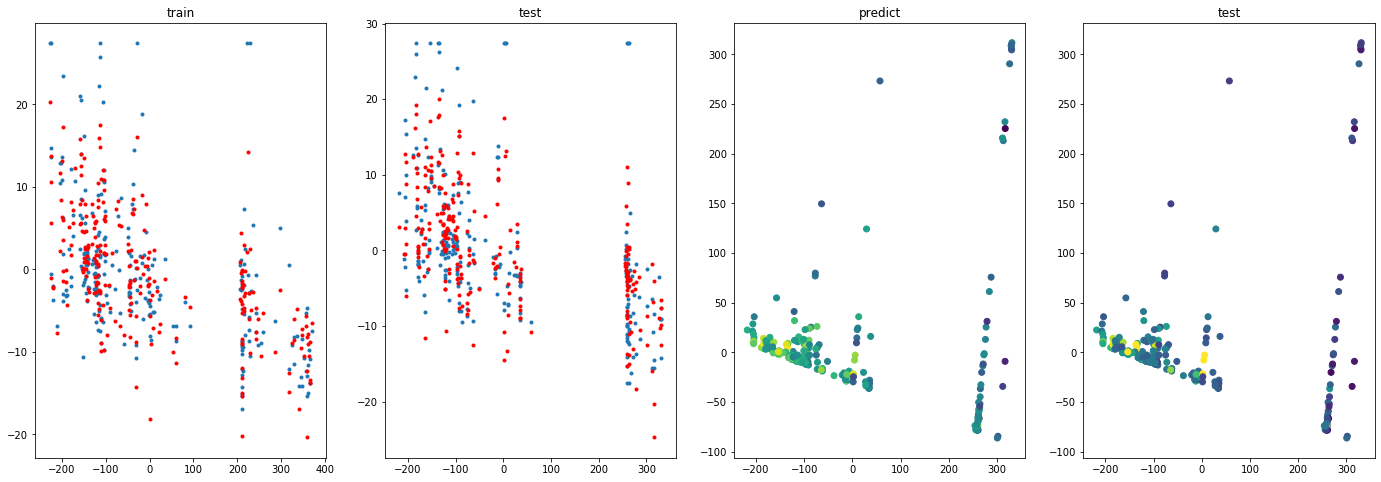

In [18]:
from sklearn.model_selection import GridSearchCV

parameters = {'lam':np.exp([i for i in range(-50,1)])}
print(np.exp([i for i in range(-50,1)]))
reg = GridSearchCV(MyLinearRegression(),parameters,cv=5)
reg.fit(X_train,T_train)
best = reg.best_estimator_

# 決定係数
print("決定係数: ", best.score(X_train, T_train)) # BaseEstimatorを継承しているため使える
# lambda
print("lam: ", best.lam)

fig, axes = plt.subplots(ncols=4, figsize=(24, 8))

axes[0].scatter(X_train_pca[:, 0], T_train, marker=".")
axes[0].scatter(X_train_pca[:, 0], best.predict(X_train), color="red", marker=".")
axes[0].set_title("train")

axes[1].scatter(X_test_pca[:, 0], T_test, marker=".")
axes[1].scatter(X_test_pca[:, 0], best.predict(X_test), color="red", marker=".")
axes[1].set_title("test")

axes[2].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=best.predict(X_test))
axes[2].set_title("predict")

axes[3].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=T_test)
axes[3].set_title("test")
fig.show()